## Mars Entry-Descent-Landing Mission Scenario

In [34]:
from IPython import display
from base64 import b64decode
from edl import *

This case study demonstrates using Pacti for formalizing a simplified version of a Mars Entry-Descent-Landing mission scenario based on the following paper: [R. Prakash et al. 2008](#ref1)
and the Mars 2020 EDL timeline from https://mars.nasa.gov/mars2020/timeline/landing/entry-descent-landing/

![](https://mars.nasa.gov/internal_resources/961/)

The figure above shows the EDL phase timeline annotated with significant waypoints (e.g., Parachute Deploy, Backshell Separation). These waypoints describe the nominal characteristics of the system state at critical events during the timeline. The EDL phase timeline involves a complex orchestration of multiple subsystems (e.g., backshell, parachute, descent stage engines, and sky crane). Since each EDL subsystem is designed to operate within a specific region of the system state, it makes sense to break the timeline of the EDL phase into phase segments corresponding to the different configurations of the system where particular subsystems play an active role in decelerating the descent. For the Mars 2020 EDL subsystems, this leads to EDL phase segments described below according to the major subsystems involved:

| EDL phase segment | Active subsystem |
| ----------------- | ---------------------- |
| S1 | Backshell |
| S2 | Parachute |
| S3 | Descent stage engines |
| S4 | Sky crane |


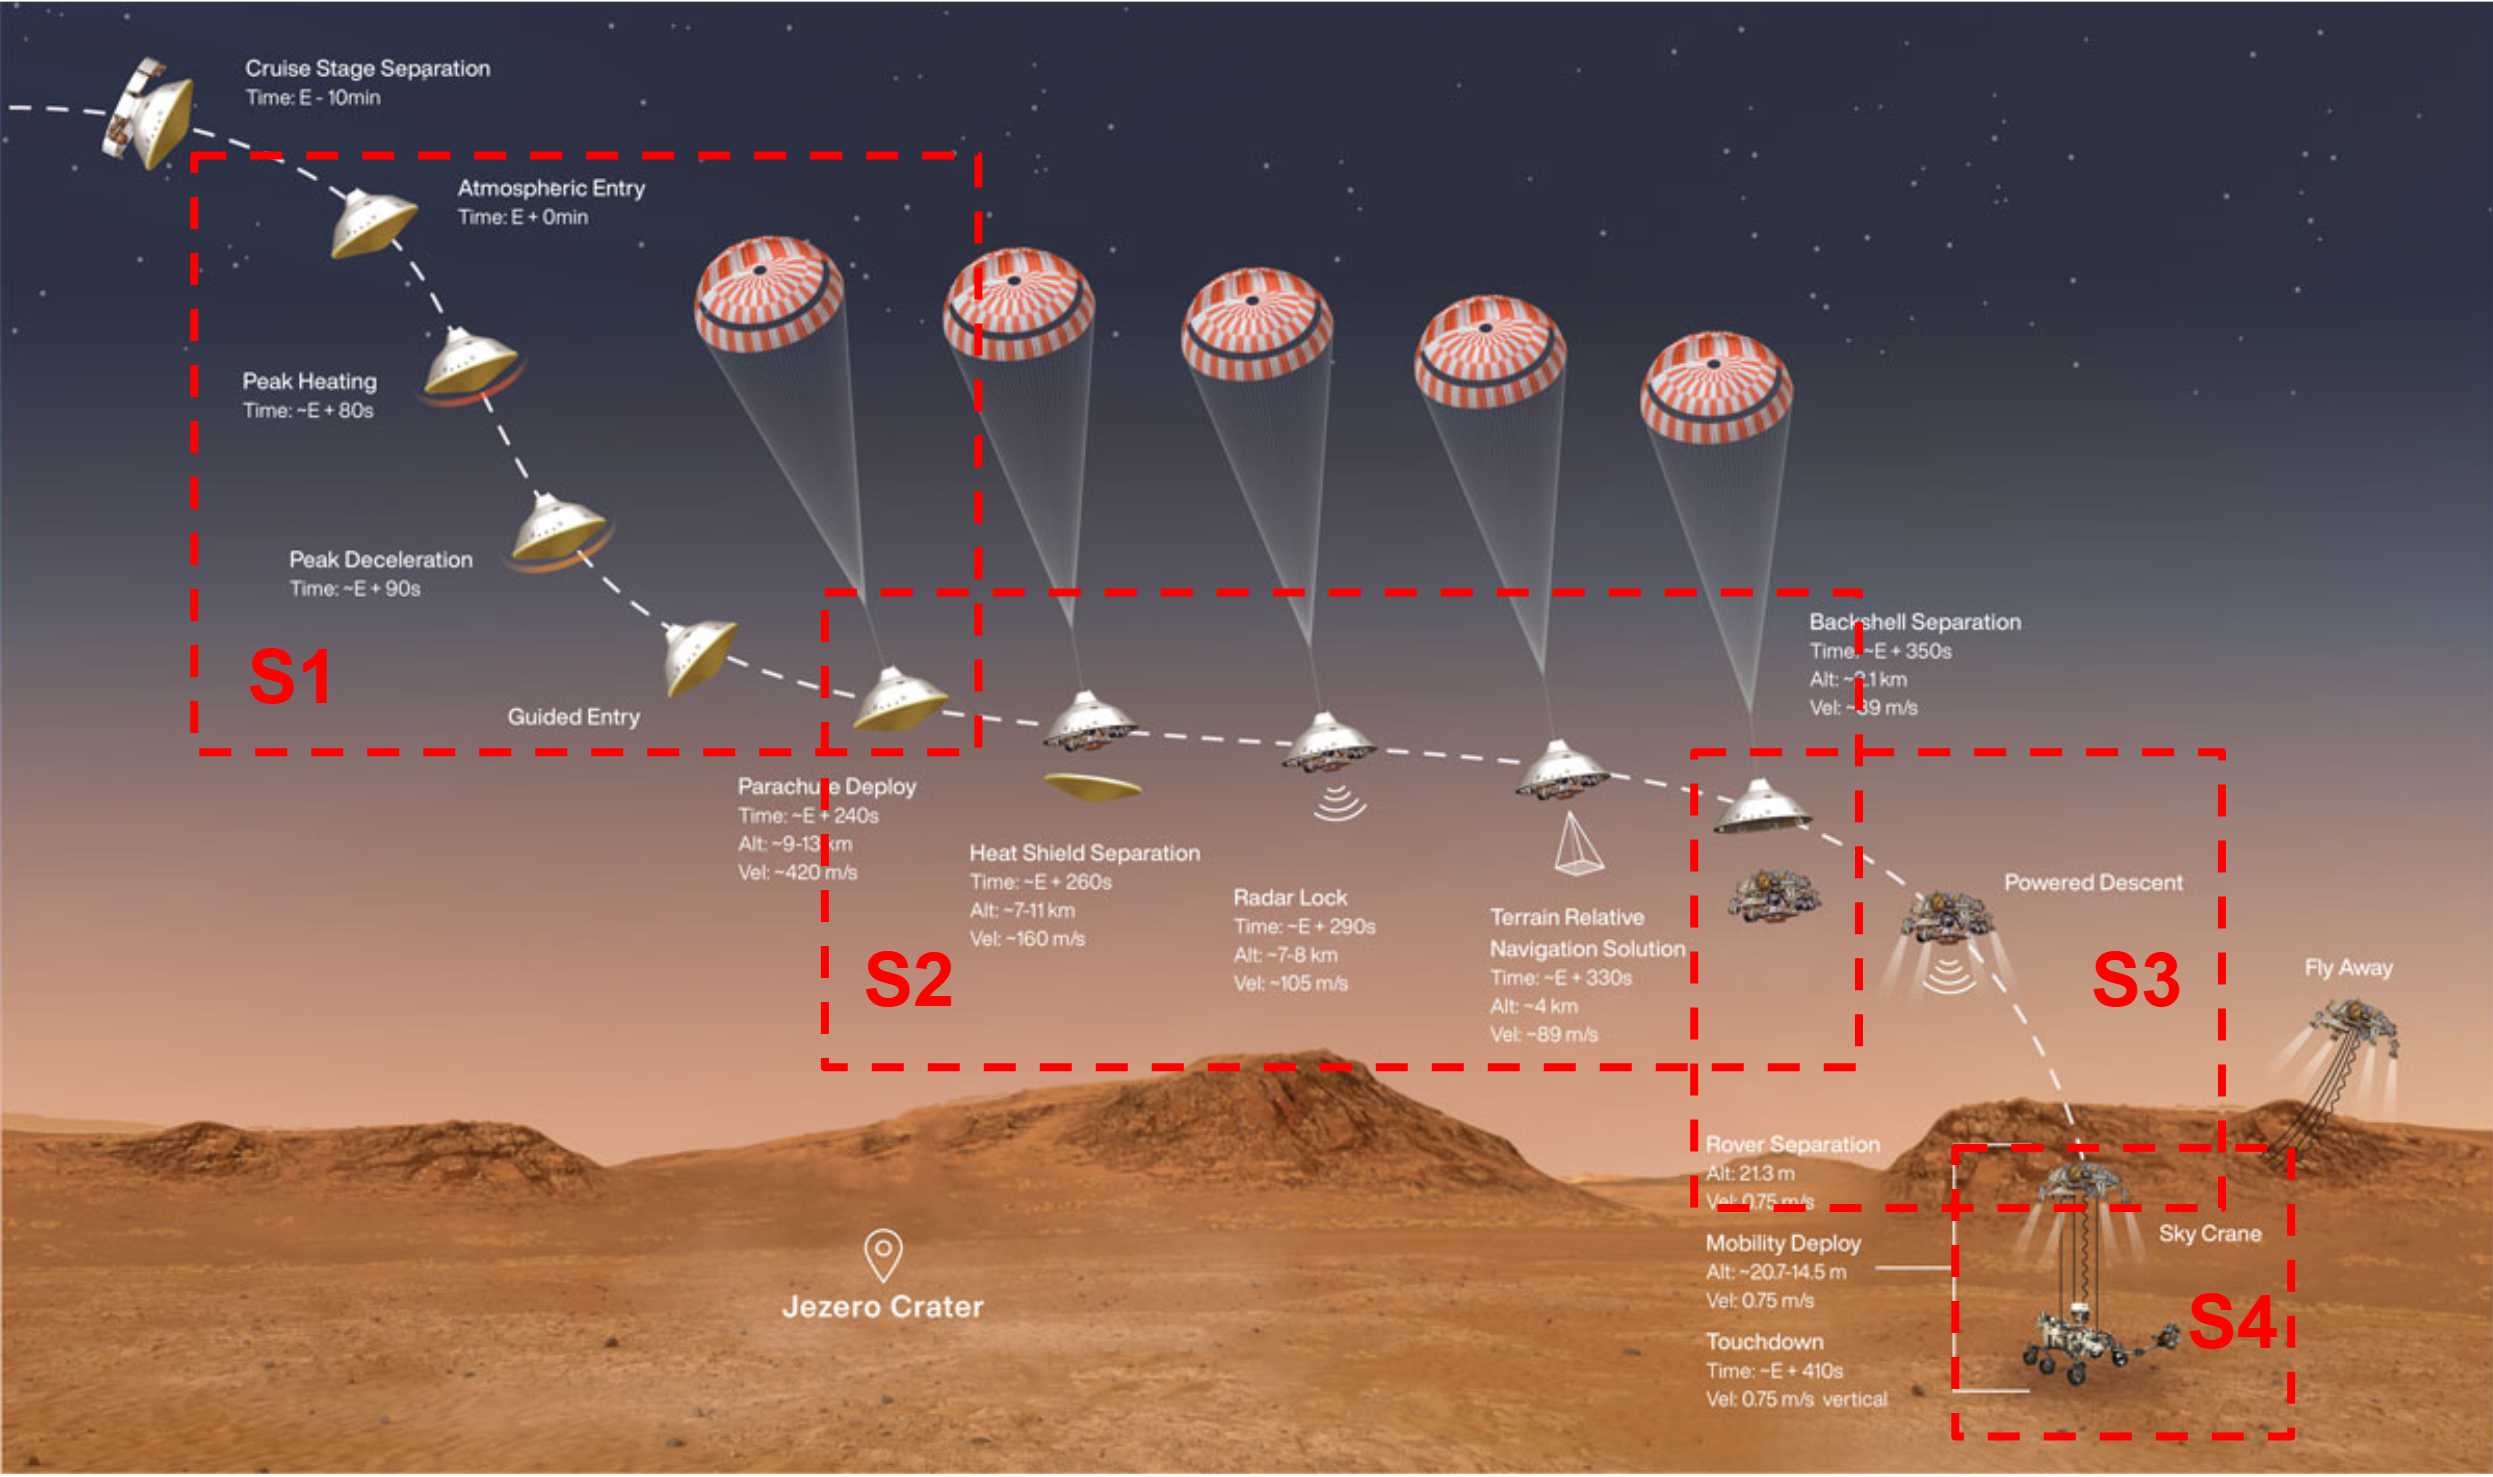

In [35]:
display.Image(b64decode(figure_m2020_edl_timeline_segmented))

### Formalizing EDL Phase segments as algebraic contracts

Given the segmentation of the EDL phase timeline according to major active subsystems, EDL designers need to spread the end-to-end EDL phase requirement -- slowing the spacecraft from 20,0000 kilometers per hour down to zero -- into segment allocations. Subsystem designers work with highly complex models of subsystems to characterize subsystem performance against a broad range of uncertainties within the requirement allocation bounds of the relevant segment. Often, subsystem designers need to renegotiate the requirement allocations among segments to explore design trades or to resolve interface issues between segments. Since EDL segment requirements evolve often, it becomes necessary to communicate among all stakeholders the current requirement baseline at a level of abstraction high enough to yield a reasonably concise baseline that all stakeholders can easily understand and yet sufficiently detailed and precise that domain experts can rigorously relate to their detailed engineering models. We propose Pacti's polyhedral convex algebra as a candidate for a rigorous formalism for specifying abstract requirements as algebraic contracts.

This proposal rests on the observation that current EDL phase design practices already capture a kind of algebraic contract as illustrated below:

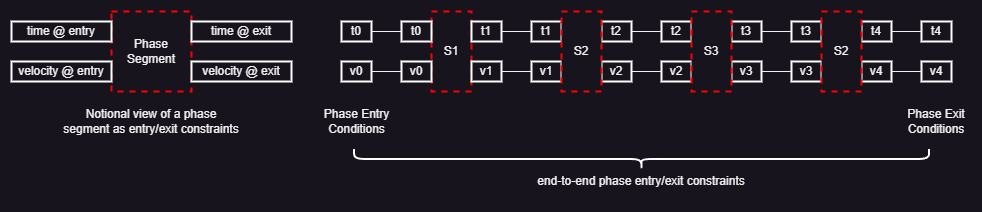

In [36]:
display.Image(b64decode(figure_segment_contracts_page1))

The left diagram shows a notional view of a phase segment characterized in terms of entry/exit conditions on state variables -- typically an interval of possible values. For this case study, we focus on time and spacecraft velocity, a subset of the Mars 2020 EDL phase segment state variables. This entry/exit characterization of each phase segment leads to an intuitive view of the EDL phase timeline as a sequence of phase contracts where the exit conditions of a segment, e.g, `S1`, constrain the entry conditions for the next segment, e.g., `S2`.

We call a scenario the combination of:
- end-to-end entry/exit conditions; i.e.: range of values for `t0` and `v0` for entry conditions, `t4` and `v4` for exit conditions
- a sequence of contracts for the phase segments; i.e., `S1`, ... `S4`

We could easily encode this scenario in Pacti; however, the composition of algebraic contracts corresponding to the phase segments would result in a very rigid end-to-end scenario contract. In effect, it would be the responsibility of the designer to make sure that all constraints are satisfiable. This encoding strategy is sketched on the left side of the figure below. With time and velocity as the pair of entry/exit condition variables, entry and exit conditions are geometrical rectangles as illustrated on the left. Pacti would be able to compose segment `Si` with segment `Si+1` if and only if the rectangle of the entry conditions of `Si+1` includes the rectangle of the exit conditions of `Si`. While technically possible, this encoding strategy would provide little value to the EDL designers because they would have the burden to find compatible exit-to-entry conditions for all composed segments.

This case study adopts an advanced encoding illustrated on the right side of the figure. The key idea involves encoding segment contracts with a special variable that encodes a linear constraint relating time and velocity. Geometrically, this means that each segment will induce a trapezoid corresponding to the admissible values of time and velocity according to this linear constraint. By leaving this special variable unbound in the scenario -- that is, it is not an end-to-end entry/exit condition variable --, composing two segments, `Si` and `Si+1`, yields a combination of trapezoid constraints parameterized with the special variables of both segments. This advanced encoding methodology takes advantage of a powerful feature of Pacti's polyhedral algebra: composing contracts effectively becomes a convex optimization problem.

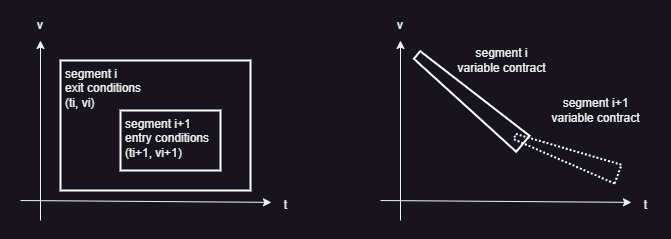

In [37]:
display.Image(b64decode(figure_segment_contracts_page3))

Applying this advanced encoding with special variables to the end-to-end EDL phase segment contracts will result in the composition sketched below on the right side of the figure.

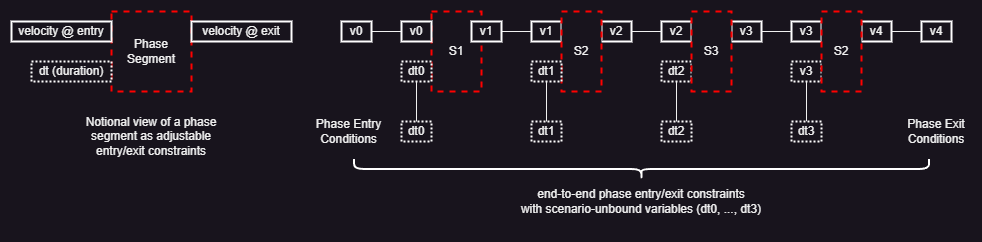

In [38]:
display.Image(b64decode(figure_segment_contracts_page2))

The special variables are `dt0`, `dt1`, `dt2`, and `dt3`; they correspond to the time interval allocated to each phase segment. Since these special variables do not appear as end-to-end EDL phase contract entry/exit conditions, they are effectively unbound in the scenario. These unbound variables parameterize the end-to-end EDL phase contract and provide EDL designers 'knobs' to explore time allocation tradeoffs among the phase segments. The rest of this notebook formalizes this encoding approach using Pacti's polyhedral algebra and illustrates an application of polyhedral contract algebra to explore some aspects of segment design characteristics.

The comparison between the two encoding approaches described above serves to illustrate the importance of what Albert Sangiovanni-Vincentelli calls "freedom from choice" [E. Lee. 2019](#ref2): Systems engineers must thinking carefully about devising an abstraction of the intented purpose of the requirement that can be encoded within the limited expressiveness of Pacti's convex polyhedral contract algebra. It would be tempting to dismiss Pacti's polyhedral algebra as too simplistic given the highly nonlinear nature of the phenomenology involved. However, systems engineers would have to confront the complexity resulting from numerous options for modeling languages and tools. In exchange for eliminating these choices, systems engineers are free to excercise their creativity and intellect to devise useful abstractions that capture the intent of the requirements. What makes Pacti somewhat unique compared to other modeling languages and tools is the ability to carry out algebraic operations on requirements formalized as contracts: in exchange from eliminating modeling language choice, systems engineers gain the freedom to explore different ways of encoding requirements and apply algebraic operations to gain insights into them.

In [39]:
# The following Python imports provide access to the Pacti API 
# and to the plotting libraries for visualizing algebraic contracts.

%matplotlib widget

from pacti.iocontract import *
from pacti.terms.polyhedra import *
import matplotlib.pyplot as plt



### Segment S1: parachute Entry

For explanations, see: https://mars.nasa.gov/resources/25445/perseverance-rover-decelerating-in-the-martian-atmosphere-illustration/

![](https://mars.nasa.gov/system/resources/detail_files/25445_04_PeakHeating-1200.jpg)

The contract below defines `dt0` as a special input variable to characterize the resulting velocity decrease due to the atmospheric entry subsystems active during this segment.

In [40]:

# EDL begins when the spacecraft reaches the top of the Martian atmosphere, traveling nearly 20,000 kilometers per hour (kph).
print(f"atmospheric_v_entry = {atmospheric_v_entry}")

# The heat shield slows the spacecraft to under 1,600 kph.
# This point marks be the exit of the atmospheric entry segment
# and the entry of the parachute deployment segment.
print(f"atmospheric_v_exit = {atmospheric_v_exit}")

print(f"atmospheric_t_entry = {atmospheric_t_entry}")
print(f"atmospheric_t_exit = {atmospheric_t_exit}")

atmospheric_t_duration = atmospheric_t_exit - atmospheric_t_entry
atmospheric_t_duration_min = atmospheric_t_duration*0.96
atmospheric_t_duration_max = atmospheric_t_duration*1.03

atmospheric_deacceleration = abs((atmospheric_v_entry - atmospheric_v_exit) / (atmospheric_t_entry - atmospheric_t_exit))
print(f"atmospheric_deacceleration={atmospheric_deacceleration}")

atmospheric_min_deacceleration = atmospheric_deacceleration*0.94
print(f"atmospheric_min_deacceleration={atmospheric_min_deacceleration}")

atmospheric_max_deacceleration = atmospheric_deacceleration*1.03
print(f"atmospheric_max_deacceleration={atmospheric_max_deacceleration}")

S1 = PolyhedralContract.from_string(
    input_varss=[
      "dt0",          # time duration for the atmospheric segment from entry to exit.
      "v0"            # velocity @ entry
    ],
    output_vars=[
      "v1"            # velocity @ exit
    ],
    assumptions=[
      # velocity @ entry
      f"v0 = {atmospheric_v_entry}"
    ],
    guarantees=[
      # validity bounds on minimum exit velocity
      # 1000 <= v1
      "-v1 <= -1000",
      
      # atmospheric_min_deacceleration * dt0 <= v0 - v1 <= atmospheric_max_deacceleration * dt0
      # v0 - v1 <= atmospheric_max_deacceleration * dt0
      f" v0 - v1 - {atmospheric_max_deacceleration} dt0 <= 0",

      # atmospheric_min_deacceleration * dt0 <= v0 - v1
      f"-v0 + v1 + {atmospheric_min_deacceleration} dt0 <= 0"
    ])

print(f"\nContract S1:\n\n{S1}")

atmospheric_v_entry = 20000.0
atmospheric_v_exit = 1600.0
atmospheric_t_entry = 0.0
atmospheric_t_exit = 90.0
atmospheric_deacceleration=204.44444444444446
atmospheric_min_deacceleration=192.17777777777778
atmospheric_max_deacceleration=210.57777777777778

Contract S1:

InVars: [dt0, v0]
OutVars:[v1]
A: [
  v0 = 20000.0
]
G: [
  -v1 <= -1000.0
  -210.57777777777778 dt0 + v0 - v1 <= 0.0
  192.17777777777778 dt0 - v0 + v1 <= 0.0
]


Even through linear constraints are conceptually simple, it is very helpful to project the space of admissible solutions shown in the blue trapezoid below. Pacti provides a simple 2D plotting projection capability for either contract assumptions or guarantees as shown below. Doing so requires:
- choosing two variables from the inputs and outputs, `x_var` and `y_var`;
- specifying values for all remaining variables, `var_values`;
- specifying a range for the plot, `x_lims` and `y_lims`.

The plot provides a useful interactive capability that tracks the mouse movement and shows underneath the plot the `x`, `y` coordinates of the mouse cursor.

During notebook authoring, this interactive capability is available only in a Jupyter environment such as Microsoft VS Code with the Microsoft Jupyter extension or with JetBrains' PyCharm Professional.

Note that neither the Github Jupyter notebook rendering nor the doc generator support the interactive plot functionality.

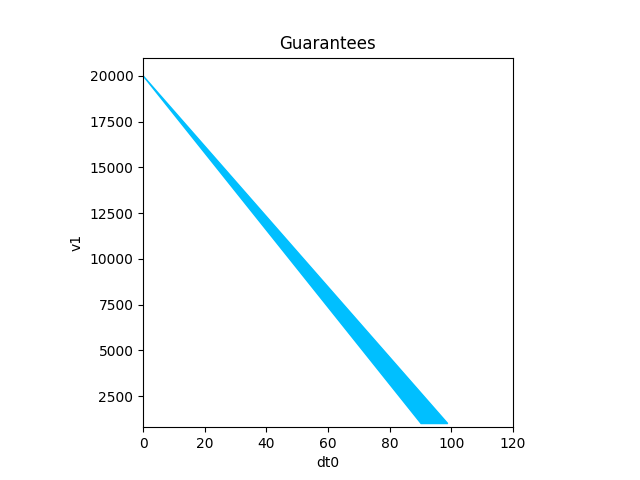

In [41]:
_ = plot_guarantees(
    contract=S1,
    x_var=Var("dt0"),
    y_var=Var("v1"),
    var_values={
        Var("v0"):atmospheric_v_entry
    },
    x_lims=(0, 120),
    y_lims=(800, 21000)
)


One can zoom into a region of interest by changing the limits of the plot as shown below:

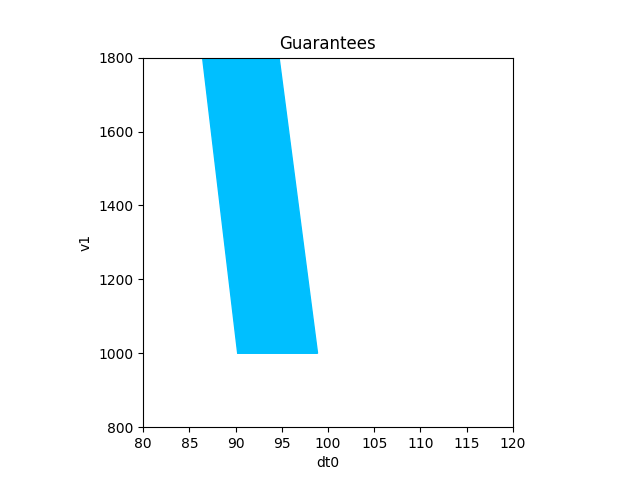

In [42]:
_ = plot_guarantees(
    contract=S1,
    x_var=Var("dt0"),
    y_var=Var("v1"),
    var_values={
        Var("v0"):atmospheric_v_entry
    },
    x_lims=(80, 120),
    y_lims=(800, 1800)
)

### Segment S2: Parachute Deployment

![](https://mars.nasa.gov/system/resources/detail_files/24989_PIA23916-800.jpg)

Similar to the atmospheric entry segment above, the parachute deployment contract below defines `dt1` as a special input variable to characterize the resulting velocity decrease due to the parachute and related subsystems active during this segment.

In [43]:
# The parachute can be safely deployed when the velocity is less than 1,600 kph.
parachute_v_entry = 1600.0

# The parachute maximum deceleration capability is 320 kph.
parachute_v_exit = 320.0

parachute_t_entry = 90.0
parachute_t_exit = 350.0
parachute_t_duration = parachute_t_exit - parachute_t_entry
parachute_t_duration_min = parachute_t_duration*0.96
parachute_t_duration_max = parachute_t_duration*1.03

parachute_deacceleration = abs((parachute_v_entry - parachute_v_exit) / (parachute_t_entry - parachute_t_exit))
print(f"parachute_deacceleration={parachute_deacceleration}")

parachute_min_deacceleration = parachute_deacceleration*0.94
print(f"parachute_min_deacceleration={parachute_min_deacceleration}")

parachute_max_deacceleration = parachute_deacceleration*1.03
print(f"parachute_max_deacceleration={parachute_max_deacceleration}")

S2 = PolyhedralContract.from_string(
    input_vars=[
      "dt1",          # time duration for the parachute deployment segment from entry to exit.
      "v1"            # entry velocity
    ],
    output_varsss=[
      "v2"            # exit velocity
    ],
    assumptions=[
      # velocity @ entry
      f"v1 <= {parachute_v_entry}"
    ],
    guarantees=[
      # # parachute effectiveness is limited to v2 >= 320
      f"-v2 <= -{parachute_v_exit}",
      
      # parachute_min_deacceleration * dt1 <= v1 - v2 <= parachute_max_deacceleration * dt1
      # v1 - v2 <= parachute_max_deacceleration * dt1
      f" v1 - v2 - {parachute_max_deacceleration} dt1 <= 0",

      # parachutec_min_deacceleration * dt1 <= v1 - v2
      f"-v1 + v2 + {parachute_min_deacceleration} dt1 <= 0"
   ])

print(f"\nContract S2:\n\n{S2}")

parachute_deacceleration=4.923076923076923
parachute_min_deacceleration=4.627692307692308
parachute_max_deacceleration=5.070769230769232

Contract S2:

InVars: [dt1, v1]
OutVars:[v2]
A: [
  v1 <= 1600.0
]
G: [
  -v2 <= -320.0
  -5.070769230769232 dt1 + v1 - v2 <= 0.0
  4.627692307692308 dt1 - v1 + v2 <= 0.0
]


Similar to the previous contract, it is helpful to plot the full range of the segment contract to confirm that the admissible region corresponds to the intent of the contract before focusing on a subregion of interest.

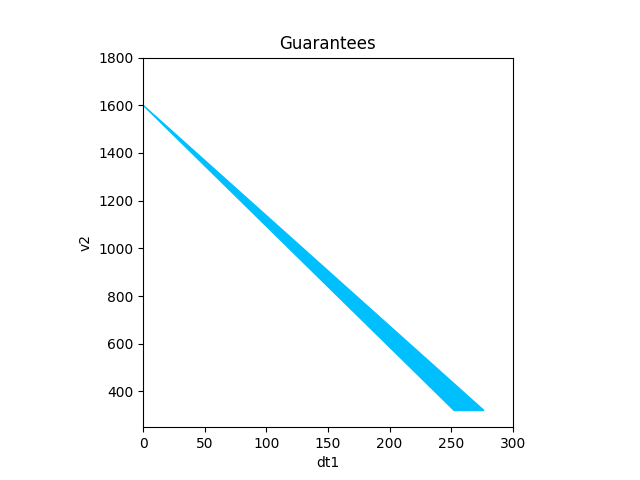

In [44]:
_ = plot_guarantees(
    contract=S2,
    x_var=Var("dt1"),
    y_var=Var("v2"),
    var_values={
        Var("v1"):parachute_v_entry
    },
    x_lims=(0, 300),
    y_lims=(250, 1800)
)

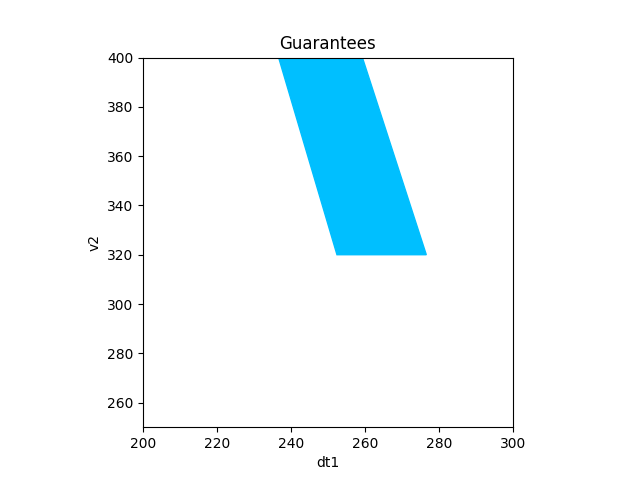

In [45]:
_ = plot_guarantees(
    contract=S2,
    x_var=Var("dt1"),
    y_var=Var("v2"),
    var_values={
        Var("v1"):parachute_v_entry
    },
    x_lims=(200, 300),
    y_lims=(250, 400)
)

#### Scenario so far: S1 || S2

We can build the scenario so far by composing the phase segments, i.e., `S1 || S2`. Doing so provides useful feedback to diagnose incompatible contracts. Successful composition provides a high-level summary of the resulting contract since composition eliminates intermediate variables. In the example below, `v1` was such an intermediate variable since it is an output of `S1` and an input of `S2`. Notice how Pacti retain the special 'knob' variables of both contracts, `dt1` and `dt2`, because these special variables are inputs only.

In [46]:
S12 = S1.compose(S2)
print(f"\nScenario so far: S1 || S2\n\n{S12}")


Scenario so far: S1 || S2

InVars: [dt0, v0, dt1]
OutVars:[v2]
A: [
  -192.177777777778 dt0 + v0 <= 1600.0
  v0 = 20000.0
]
G: [
  -5.07076923076923 dt1 - v2 <= -1000.0
  -v2 <= -320.0
  192.177777777778 dt0 + 4.627692307692308 dt1 - v0 + v2 <= 0.0
]


Plotting the guarantees for the nominal entry conditions (i.e., `v0=atmospheric_v_entry`) requires using a value of `dt0` that is compatible with the constraints. In the example below, we use `dt0=98`.

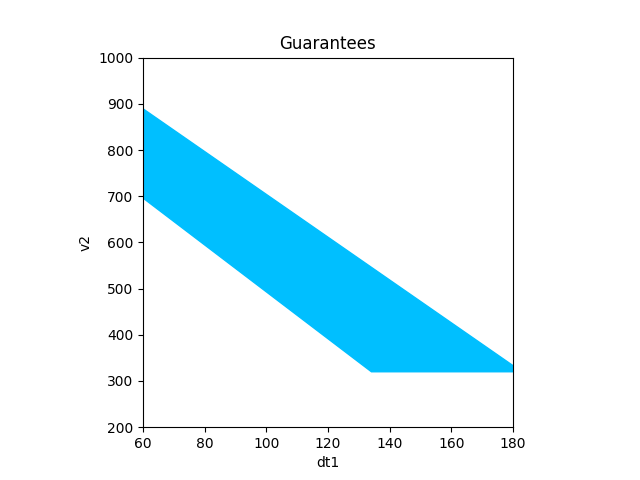

In [47]:
_ = plot_guarantees(
    contract=S12,
    x_var=Var("dt1"),
    y_var=Var("v2"),
    var_values={
        Var("v0"):atmospheric_v_entry,
        Var("dt0"):98
    },
    x_lims=(60, 180),
    y_lims=(200, 1000)
)

### Segment S3: Powered Descent

![](https://mars.nasa.gov/system/resources/detail_files/25449_08_PoweredDescent-1200.jpg)

Similar to previous segment encodings, the powered descent contract below defines `dt2` as a special input variable to characterize the resulting velocity decrease due to the powered descent stage subsystem active during this segment.

In [48]:
powered_descent_v_entry = 600.0
powered_descent_v_exit = 2.7

powered_descent_t_entry = 350.0
powered_descent_t_exit = 398.0
powered_descent_t_duration =powered_descent_t_exit - powered_descent_t_entry
powered_descent_t_duration_min = powered_descent_t_duration*0.96
powered_descent_t_duration_max = powered_descent_t_duration*1.03

powered_descent_deacceleration = abs((powered_descent_v_entry - powered_descent_v_exit) / (powered_descent_t_entry - powered_descent_t_exit))
print(f"powered_descent_deacceleration={powered_descent_deacceleration}")

powered_descent_min_deacceleration = powered_descent_deacceleration*0.94
print(f"powered_descent_min_deacceleration={powered_descent_min_deacceleration}")

powered_descent_max_deacceleration = powered_descent_deacceleration*1.03
print(f"powered_descent_max_deacceleration={powered_descent_max_deacceleration}")

S3 = PolyhedralContract.from_string(
    input_varsss=[
      "dt2",          # time duration for the powered descent from entry to exit.
      "v2"            # entry velocity
    ],
    output_vars=[
      "v3"            # exit velocity
    ],
    assumptions=[
      # velocity @ entry
      f"v2 <= {powered_descent_v_entry}",
    ],
    guarantees=[
      # velocity @ exit
      "-v3 <= 0",
      
      # powered_descent_min_deacceleration * dt2 <= v2 - v3 <= powered_descent_max_deacceleration * dt1
      # v2 - v3 <= powered_descent_max_deacceleration * dt2
      f" v2 - v3 - {powered_descent_max_deacceleration} dt2 <= 0",

      # powered_descent_min_deacceleration * dt2 <= v2 - v3
      f"-v2 + v3 + {powered_descent_min_deacceleration} dt2 <= 0"
    ])

print(f"\nContract S3:\n\n{S3}")

powered_descent_deacceleration=12.44375
powered_descent_min_deacceleration=11.697125
powered_descent_max_deacceleration=12.8170625

Contract S3:

InVars: [dt2, v2]
OutVars:[v3]
A: [
  v2 <= 600.0
]
G: [
  -v3 <= 0.0
  -12.8170625 dt2 + v2 - v3 <= 0.0
  11.697125 dt2 - v2 + v3 <= 0.0
]


Here, we plot only a region of interest where the exit velocity may reach zero depending on the value of `dt2`.

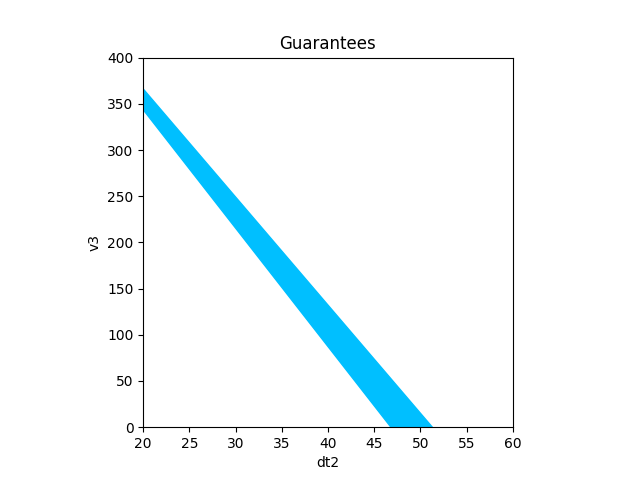

In [49]:
_ = plot_guarantees(
    contract=S3,
    x_var=Var("dt2"),
    y_var=Var("v3"),
    var_values={
        Var("v2"):powered_descent_v_entry
    },
    x_lims=(20, 60),
    y_lims=(0, 400)
)

#### Scenario so far: S1 || S2 || S3

Similar to the above, we expect Pacti to eliminate the intermediate variables, `v1` and `v2`, and to retain all of our special 'knob' variables, `dt0`, `dt1`, and `dt2`,  from the composed contracts.

In [50]:
S123 = S12.compose(S3)
print(f"\nScenario so far: S1 || S2 || S3\n\n{S123}")


Scenario so far: S1 || S2 || S3

InVars: [dt0, v0, dt1, dt2]
OutVars:[v3]
A: [
  -192.177777777778 dt0 - 4.62769230769231 dt1 + v0 <= 600.0
  -192.177777777778 dt0 + v0 <= 1600.0
  v0 = 20000.0
]
G: [
  -5.07076923076923 dt1 - 12.8170625 dt2 - v3 <= -1000.0
  -12.8170625 dt2 - v3 <= -320.0
  -v3 <= 0.0
  192.177777777778 dt0 + 4.62769230769231 dt1 + 11.697125 dt2 - v0 + v3 <= 0.0
]


Plotting the guarantees of the composition so far for the nominal entry conditions (i.e., `v0=atmospheric_v_entry`) requires choosing values for the remaining 'knobs': `dt0` and `dt1`.

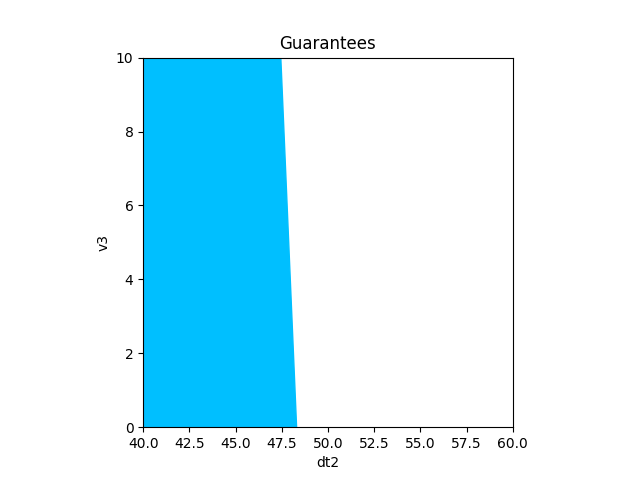

In [51]:
_ = plot_guarantees(
    contract=S123,
    x_var=Var("dt2"),
    y_var=Var("v3"),
    var_values={
        Var("v0"):atmospheric_v_entry,
        Var("dt0"):98,
        Var("dt1"):130,
    },
    x_lims=(40, 60),
    y_lims=(0, 10)
)

### Segment S4: Sky Crane

![](https://mars.nasa.gov/system/resources/detail_files/3650_PIA14839-full2.jpg)

Similar to previous segment encodings, the sky crane contract below defines `dt3` as a special input variable to characterize the resulting velocity decrease due to the sky crane subsystem active during this segment.

In [52]:
# The sky crane maneuver initiates at a velocity less than 2.7 kph.
print(f"skycrane_v_entry = {skycrane_v_entry}")

# The sky crane maneuver ends when the rover velocity reaches 0 kph.
print(f"skycrane_v_exit = {skycrane_v_exit}")

print(f"skycrane_t_entry = {skycrane_t_entry}")
print(f"skycrane_t_exit = {skycrane_t_exit}")

skycrane_t_duration = skycrane_t_exit - skycrane_t_entry
skycrane_t_duration_min = skycrane_t_duration*0.96
skycrane_t_duration_max = skycrane_t_duration*1.03

skycrane_deacceleration = abs((skycrane_v_entry - skycrane_v_exit) / (skycrane_t_entry - skycrane_t_exit))
print(f"skycrane_deacceleration={skycrane_deacceleration}")

skycrane_min_deacceleration = skycrane_deacceleration*0.94
print(f"skycrane_min_deacceleration={skycrane_min_deacceleration}")

skycrane_max_deacceleration = skycrane_deacceleration*1.03
print(f"skycrane_max_deacceleration={skycrane_max_deacceleration}")

S4 = PolyhedralContract.from_string(
    input_vars=[
      "dt3",          # time duration for the powered descent from entry to exit.
      "v3"            # entry velocity
    ],
    output_vars=[
      "v4"            # exit velocity
    ],
    assumptions=[
      # velocity @ entry
      f"v3 <= {skycrane_v_entry}"
    ],
    guarantees=[
      # velocity @ exit
      "-v4 <= 0",

      # skycrane_min_deacceleration * dt3 <= v3 - v4 <= skycrane_max_deacceleration * dt1
      # v3 - v4 <= skycrane_max_deacceleration * dt3
      f" v3 - v4 - {skycrane_max_deacceleration} dt3 <= 0",

      # skycrane_min_deacceleration * dt3 <= v3 - v4
      f"-v3 + v4 + {skycrane_min_deacceleration} dt3 <= 0"
    ])

print(f"\nContract S4:\n\n{S4}")

skycrane_v_entry = 2.7
skycrane_v_exit = 0
skycrane_t_entry = 398.0
skycrane_t_exit = 410.0
skycrane_deacceleration=0.225
skycrane_min_deacceleration=0.2115
skycrane_max_deacceleration=0.23175

Contract S4:

InVars: [dt3, v3]
OutVars:[v4]
A: [
  v3 <= 2.7
]
G: [
  -v4 <= 0.0
  -0.23175 dt3 + v3 - v4 <= 0.0
  0.2115 dt3 - v3 + v4 <= 0.0
]


Here, we plot only a region of interest where the exit velocity may reach zero depending on the value of dt3.

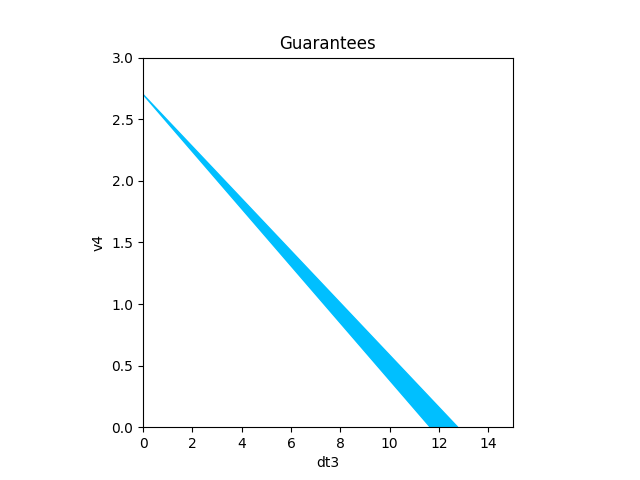

In [53]:
_ = plot_guarantees(
    contract=S4,
    x_var=Var("dt3"),
    y_var=Var("v4"),
    var_values={
        Var("v3"):skycrane_v_entry
    },
    x_lims=(0, 15),
    y_lims=(0, 3)
)

#### Scenario so far: S1 || S2 || S3 || S4

Similar to the above, we expect Pacti to eliminate the intermediate variables, `v1`, `v2`, and `v3` and to retain all of our special 'knob' variables, `dt0`, `dt1`, `dt2`, and `dt3` from the composed contracts.

In [54]:
S1234 = S123.compose(S4)
print(f"\nScenario so far: S1 || S2 || S3 || S4\n\n{S1234}")


Scenario so far: S1 || S2 || S3 || S4

InVars: [dt0, v0, dt1, dt2, dt3]
OutVars:[v4]
A: [
  -192.177777777778 dt0 - 4.62769230769231 dt1 - 11.697125 dt2 + v0 <= 2.7
  -192.177777777778 dt0 - 4.62769230769231 dt1 + v0 <= 600.0
  -192.177777777778 dt0 + v0 <= 1600.0
  v0 = 20000.0
]
G: [
  -5.07076923076923 dt1 - 12.8170625 dt2 - 0.23175 dt3 - v4 <= -1000.0
  -12.8170625 dt2 - 0.23175 dt3 - v4 <= -320.0
  192.177777777778 dt0 + 4.62769230769231 dt1 + 11.697125 dt2 + 0.2115 dt3 - v0 + v4 <= 0.0
  -v4 <= 0.0
]



Plotting the guarantees of the composition so far for the nominal entry conditions (i.e., v0=atmospheric_v_entry) requires choosing values for the remaining 'knobs': `dt0`, `dt1`, and `dt2`.

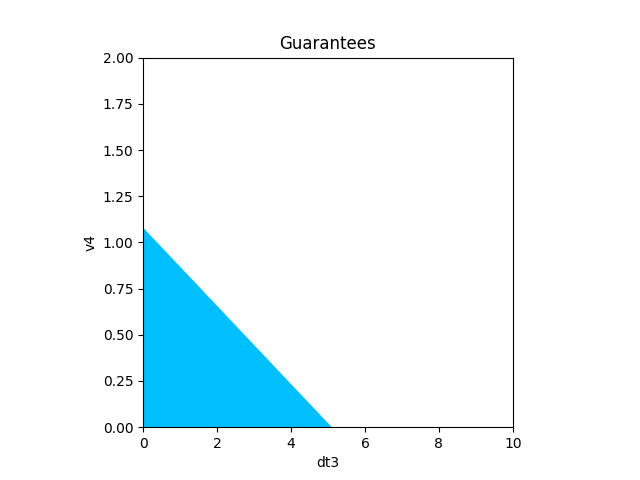

In [55]:
_ = plot_guarantees(
    contract=S1234,
    x_var=Var("dt3"),
    y_var=Var("v4"),
    var_values={
        Var("v0"):atmospheric_v_entry,
        Var("dt0"):98,
        Var("dt1"):128,
        Var("dt2"):49
    },
    x_lims=(0, 10),
    y_lims=(0, 2)
)

## Using contract algebra for manipulating contracts

Pacti provides 3 algebraic operations on contracts:
- composition, which builds systems from subsystem contracts as shown above
- quotient, which computes a kind of difference operation
- refinement, which verifies that a detailed contract conforms with an abstract contract.

Here, we demonstrate two applications of the quotient operation for:
- deriving end-to-end constraints for the special 'knob' variables,
- calculating a missing contract and of the refinement operation to verify the results.

Before we go into these details, we need to write a specification for the toplevel EDL phase itself, which is very simple: 
- assume the entry conditions are as given (exact values in this example)
- guarantee the desired exit conditions are as given (value ranges in this example)

In [56]:
EDL0 = PolyhedralContract.from_string(
    input_vars=[
      "t0",          # time @ entry
      "v0"           # velocity @ entry
    ],
    output_vars=[
      "t4",
      "v4"            # velocity @ exit
    ],
    assumptions=[
      # time @ entry
      f"t0 = {atmospheric_t_entry}",

      # velocity @ entry
      f"v0 = {atmospheric_v_entry}",
    ],
    guarantees=[
      # bound for time @ exit
      "t4 <= 500",
      "-t4 <= 0",

      # bound for velocity @ exit
      "v4 <= 2.7",
      f"-v4 <= {skycrane_v_exit}"
    ])
print(f"toplevel EDL scenario contract: EDL0\n\n{EDL0}")

toplevel EDL scenario contract: EDL0

InVars: [t0, v0]
OutVars:[t4, v4]
A: [
  t0 = 0.0
  v0 = 20000.0
]
G: [
  t4 <= 500.0
  -t4 <= 0.0
  v4 <= 2.7
  -v4 <= 0.0
]


### Deriving end-to-end allocation constraints

Given the toplevel, end-to-end EDL scenario contract, we want to extract the derived constraints for our special 'knob' input variables governing the allocated resources to each phase segment. These derived constraints capture the relationships that an admissible allocation of resources must satisfy as a function of the remaining variables, i.e., `t0` and `t4`. Notice that Pacti managed to simplify the constraints by eliminating both input and output velocities, `v0` and `v4`.

In [57]:
EndToEndDTconstraints = EDL0.quotient(S1234)
print(f"End-to-end DT constraints: EndToEndDTconstraints\n\n{EndToEndDTconstraints}")

End-to-end DT constraints: EndToEndDTconstraints

InVars: [t0]
OutVars:[t4, dt0, dt1, dt2, dt3]
A: [
  t0 = 0.0
]
G: [
  t4 <= 500.0
  -t4 <= 0.0
  -192.177777777778 dt0 - 4.62769230769231 dt1 - 11.697125 dt2 - 0.2115 dt3 <= -19997.3
  -192.177777777778 dt0 - 4.62769230769231 dt1 - 11.697125 dt2 <= -19997.3
  -192.177777777778 dt0 - 4.62769230769231 dt1 <= -19400.0
  -192.177777777778 dt0 <= -18400.0
]


### Calculating the contract for a missing subsystem

Suppose that the EDL designers are aware of the allocation-based modeling strategy with the special 'knob' input variables: `dt0`, ... `dt3`. At the toplevel, one could specify allocation limits for each segment contract as specified below.

In [58]:
EDL1 = PolyhedralContract.from_string(
    input_vars=[
      "t0",          # time @ entry
      "dt0",         # duration of S1
      "dt1",         # duration of S2
      "dt2",         # duration of S3
      "dt3",         # duration of S4
      "v0"           # velocity @ entry
    ],
    output_vars=[
      "v4"            # velocity @ exit
    ],
    assumptions=[
      # time @ entry
      f"t0 = {atmospheric_t_entry}",

      # velocity @ entry
      f"v0 = {atmospheric_v_entry}",

      "-dt0 <= 100",
      "-dt0 <= -96",
      "dt1 <= 130",
      "-dt1 <= -126",
      "dt2 <= 52",
      "-dt2 <= -47",
      "dt3 <= 5.1",
      "-dt3 <= -4.9",
    ],
    guarantees=[
      # velocity @ exit
      "v4 <= 2.7",
      f"-v4 <= {skycrane_v_exit}"
    ])
print(f"toplevel EDL scenario contract with allocation bounds: EDL1\n\n{EDL1}")

toplevel EDL scenario contract with allocation bounds: EDL1

InVars: [t0, dt0, dt1, dt2, dt3, v0]
OutVars:[v4]
A: [
  t0 = 0.0
  v0 = 20000.0
  -dt0 <= 100.0
  -dt0 <= -96.0
  dt1 <= 130.0
  -dt1 <= -126.0
  dt2 <= 52.0
  -dt2 <= -47.0
  dt3 <= 5.1
  -dt3 <= -4.9
]
G: [
  v4 <= 2.7
  -v4 <= 0.0
]


Suppose we have contracts for a subset of the EDL segments, `S1`, `S2`, and `S4`. Given the toplevel EDL scenario contract with allocation bounds, we calculate a contract for the missing subsystem, `S3`, with a simple script of algebraic manipulations:
- first, compose all available segment contracts for `S1`, `S2`, and `S4`,
- then, calculate the difference between the toplevel EDL scenario contract with allocation bounds and the 3-segment composite contract.

In [59]:
# First, compose the contracts we have: S1, S2, and S4.
S124 = S12.compose(S4)
print(f"Contract for S1 || S2 || S4:\n\n{S124}")


Contract for S1 || S2 || S4:

InVars: [dt0, v0, dt1, dt3, v3]
OutVars:[v2, v4]
A: [
  -192.177777777778 dt0 + v0 <= 1600.0
  v0 = 20000.0
  v3 <= 2.7
]
G: [
  -5.07076923076923 dt1 - v2 <= -1000.0
  -v2 <= -320.0
  192.177777777778 dt0 + 4.627692307692308 dt1 - v0 + v2 <= 0.0
  -v4 <= 0.0
  -0.23175 dt3 + v3 - v4 <= 0.0
  0.2115 dt3 - v3 + v4 <= 0.0
]


In [60]:
# Then, define the missing S3 as the quotient of toplevel contract w.r.t. what we have.
missingS3 = EDL1.quotient(S124)
print(f"Contract for the missing S3 segment:\n\n{missingS3}")

Contract for the missing S3 segment:

InVars: [t0, dt2, v2]
OutVars:[v3]
A: [
  t0 = 0.0
  dt2 <= 52.0
  -dt2 <= -47.0
]
G: [
  v3 <= 2.7
]


It is good practice to verify the results; so let's recompose the scenario segments, starting from `S1` and `S2` we already have and composing the missing `S3` contract calculated above: 

In [61]:
S123_implied = S12.compose(missingS3)
print(S123_implied)


InVars: [dt0, v0, dt1, t0, dt2]
OutVars:[v3]
A: [
  t0 = 0.0
  dt2 <= 52.0
  -dt2 <= -47.0
  -192.177777777778 dt0 + v0 <= 1600.0
  v0 = 20000.0
]
G: [
  192.177777777778 dt0 - 0.44307692307691937 dt1 - v0 <= -1000.0
  192.177777777778 dt0 + 4.62769230769231 dt1 - v0 <= -320.0
  v3 <= 2.7
]


.. and compose that with the last segment, `S4`, we already have:

In [62]:
S1234_implied = S123_implied.compose(S4)
print(S1234_implied)

InVars: [dt0, v0, dt1, t0, dt2, dt3]
OutVars:[v4]
A: [
  t0 = 0.0
  dt2 <= 52.0
  -dt2 <= -47.0
  -192.177777777778 dt0 + v0 <= 1600.0
  v0 = 20000.0
]
G: [
  192.177777777778 dt0 - 0.44307692307691937 dt1 - v0 <= -1000.0
  192.177777777778 dt0 + 4.62769230769231 dt1 - v0 <= -320.0
  0.2115 dt3 + v4 <= 2.7
  -v4 <= 0.0
  -0.020250000000000018 dt3 <= 0.0
]


Now, we can verify that this end-to-end scenario contract based on the missing contract for `S3` is algebraically a refinement of the toplevel EDL scenario contract with allocation bounds.

In [63]:
print(S1234_implied.refines(EDL1))

True


## References

<a id="ref1"></a> __[R. Prakash et al. 2008](https://ieeexplore.ieee.org/abstract/document/4526283)__

R. Prakash et al., "Mars Science Laboratory Entry, Descent, and Landing System Overview," 2008 IEEE Aerospace Conference, Big Sky, MT, USA, 2008, pp. 1-18, doi: 10.1109/AERO.2008.4526283.

<a id="ref2"></a> __[E. Lee. 2019](https://dl.acm.org/doi/10.1145/3299902.3320432)__

E. Lee, "Freedom From Choice and the Power of Models: in Honor of Alberto Sangiovanni-Vincentelli", In Proceedings of the 2019 International Symposium on Physical Design, April 2019.

